<a href="https://colab.research.google.com/github/strangelycutlemon/DS-Unit-2-Kaggle-Challenge/blob/master/module1/assignment_kaggle_challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Kaggle Challenge, Module 1

## Assignment
- [X] Do train/validate/test split with the Tanzania Waterpumps data.
- [X] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For example, [what other columns have zeros and shouldn't?](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values) What other columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)
- [X] Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.
- [X] Get your validation accuracy score.
- [ ] Get and plot your feature importances.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

### Reading

- A Visual Introduction to Machine Learning
  - [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
  - [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU) — _Don’t worry about understanding the code, just get introduced to the concepts. This 10 minute video has excellent diagrams and explanations._
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)


### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Try other [scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html).
- [ ] Try other [scikit-learn scalers](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Make exploratory visualizations and share on Slack.


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this problem, you may want to use the parameter `logistic=True`

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from a previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```



In [0]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # category_encoders, version >= 2.0
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade category_encoders pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module1')

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv('../data/tanzania/train_features.csv'), 
                 pd.read_csv('../data/tanzania/train_labels.csv'))
test = pd.read_csv('../data/tanzania/test_features.csv')
sample_submission = pd.read_csv('../data/tanzania/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [44]:
train.head()

id  amount_tsh  ... waterpoint_type_group    status_group
0  69572      6000.0  ...    communal standpipe      functional
1   8776         0.0  ...    communal standpipe      functional
2  34310        25.0  ...    communal standpipe      functional
3  67743         0.0  ...    communal standpipe  non functional
4  19728         0.0  ...    communal standpipe      functional

[5 rows x 41 columns]

In [0]:
y_train = train['status_group']
X_train = train.drop(['status_group', 'id'], axis=1)

# Removing 'id' which is useless.

In [46]:
# Train/test/val split.

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, train_size=0.8, test_size=0.2,
    random_state=42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

# The shapes are good.

((47520, 39), (11880, 39), (47520,), (11880,))

In [47]:
import plotly.express as px
fig = px.scatter_mapbox(train, lat='latitude', lon='longitude', color='status_group', opacity=1)
fig.update_layout(mapbox_style='stamen-terrain')
fig.show()

# Outliers out in the ocean off to the left.

In [53]:
from pandas_profiling import ProfileReport

X_train.profile_report()

In [0]:
# from sklearn.preprocessing import OneHotEncoder

# ce = OneHotEncoder(use_cat_names=True)

# trainlook = train.copy()


# trainlook_encoded = ce.fit_transform(

In [64]:
# import seaborn as sns

# def cat_me(feature):
#   if train[feature].nunique() < 20:
#     sns.catplot(x=feature, y='status_group', data=train, kind='bar')
#   else:
#     pass
# for i in sorted(train.columns):
#   cat_me(i)

ValueError: ignored

In [0]:
import numpy as np

def wrangle(X):
  """
  Function to wrangle all dataframes in the same way.
  1. remove outliers 
    - geospatial bounding box
  """

  # prevent SettingWithCopyWarning
  X = X.copy()

  # Set latitude to 0 if outside the country
  X['latitude'] = X['latitude'].replace(-2e-08, 0)

  # We can't drop rows with zeroes because that could mess up the submission.
  # So let's just impute the values.
  cols_with_zeros = ['longitude', 'latitude']
  for col in cols_with_zeros:
    X[col] = X[col].replace(0, np.nan)

  # drop columns that are duplicates or missing over 1/3 of their values.
  X = X.drop(columns=['extraction_type_group', 'recorded_by','quantity_group', 'construction_year', 'num_private', 
                      'region_code', 'management_group'], errors='ignore')
  # Reduce cardinality with an OTHER value
  categorical_features = X.select_dtypes(exclude='number').columns.tolist()
  for col in categorical_features:
    top10 = X[col].value_counts()[:10].index
    X.loc[~X[col].isin(top10), col] = 'OTHER'
          
  return X

# wrangle_me = [X_train, X_val]

# for i in wrangle_me:
#   i = wrangle(i)
#   print(i.shape)

X_train = wrangle(X_train)
X_val = wrangle(X_val)

In [0]:
numeric_features = X_train.select_dtypes(include='number').columns.tolist()

cardinality = X_train.select_dtypes(exclude='number').nunique()

categorical_features = cardinality[cardinality <= 50].index.tolist()

# categorical_features = ['basin',
#  'region',
#  'public_meeting',
#  'scheme_management',
#  'permit',
#  'extraction_type',
#  'extraction_type_group',
#  'extraction_type_class',
#  'management',
#  'payment',
#  'payment_type',
#  'water_quality',
#  'quality_group',
#  'quantity',
#  'source',
#  'source_type',
#  'source_class',
#  'waterpoint_type',
#  'waterpoint_type_group']

features = categorical_features + numeric_features

In [111]:
categorical_features

['basin',
 'region',
 'public_meeting',
 'scheme_management',
 'permit',
 'extraction_type',
 'extraction_type_class',
 'management',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group']

In [0]:
X_train = X_train[features]
X_val = X_val[features]
test = test[features]

In [113]:
X_train.columns

Index(['basin', 'region', 'public_meeting', 'scheme_management', 'permit',
       'extraction_type', 'extraction_type_class', 'management', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity', 'source',
       'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'amount_tsh', 'gps_height', 'longitude',
       'latitude', 'district_code', 'population'],
      dtype='object')

In [114]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(
  ce.OneHotEncoder(use_cat_names=True),
  SimpleImputer(verbose=1, strategy='median'),
  StandardScaler(),
  DecisionTreeClassifier(max_depth=18)
)

pipeline.fit(X_train, y_train)

print("Validation Accuracy", pipeline.score(X_val, y_val))

# y_pred = pipeline.predict(test)

Validation Accuracy 0.7716329966329967


In [0]:
'''
Passes and results:
LogisticRegressionCV
1. Removed a few duplicate features
  - 73.3% accuracy
2. Removed more features
  - 0.7314814814814815

DecisionTreeClassifier
1. Changed model type
  - 0.7622895622895622
2. Fix the wrangler so it actually modifies the dataframes
  - 0.7509259259259259
  - Removing those features lowered our score.
3. Add cardinality reduction to the wrangler
  - 0.7484848484848485
  - And the score drops again.
4. Set max_depth
  - 15 -> 0.7636363636363637
  - 16 -> 0.7659090909090909
  - 17 -> 0.7648989898989899
  - 18 -> 0.7668350168350169
5. max_depth=18, removed 'recorded_by'
  - 0.7682659932659933
6. Imputer strategy=median
  - 0.7698653198653199
7. Remove extraction type group
  - 0.7716329966329967
'''

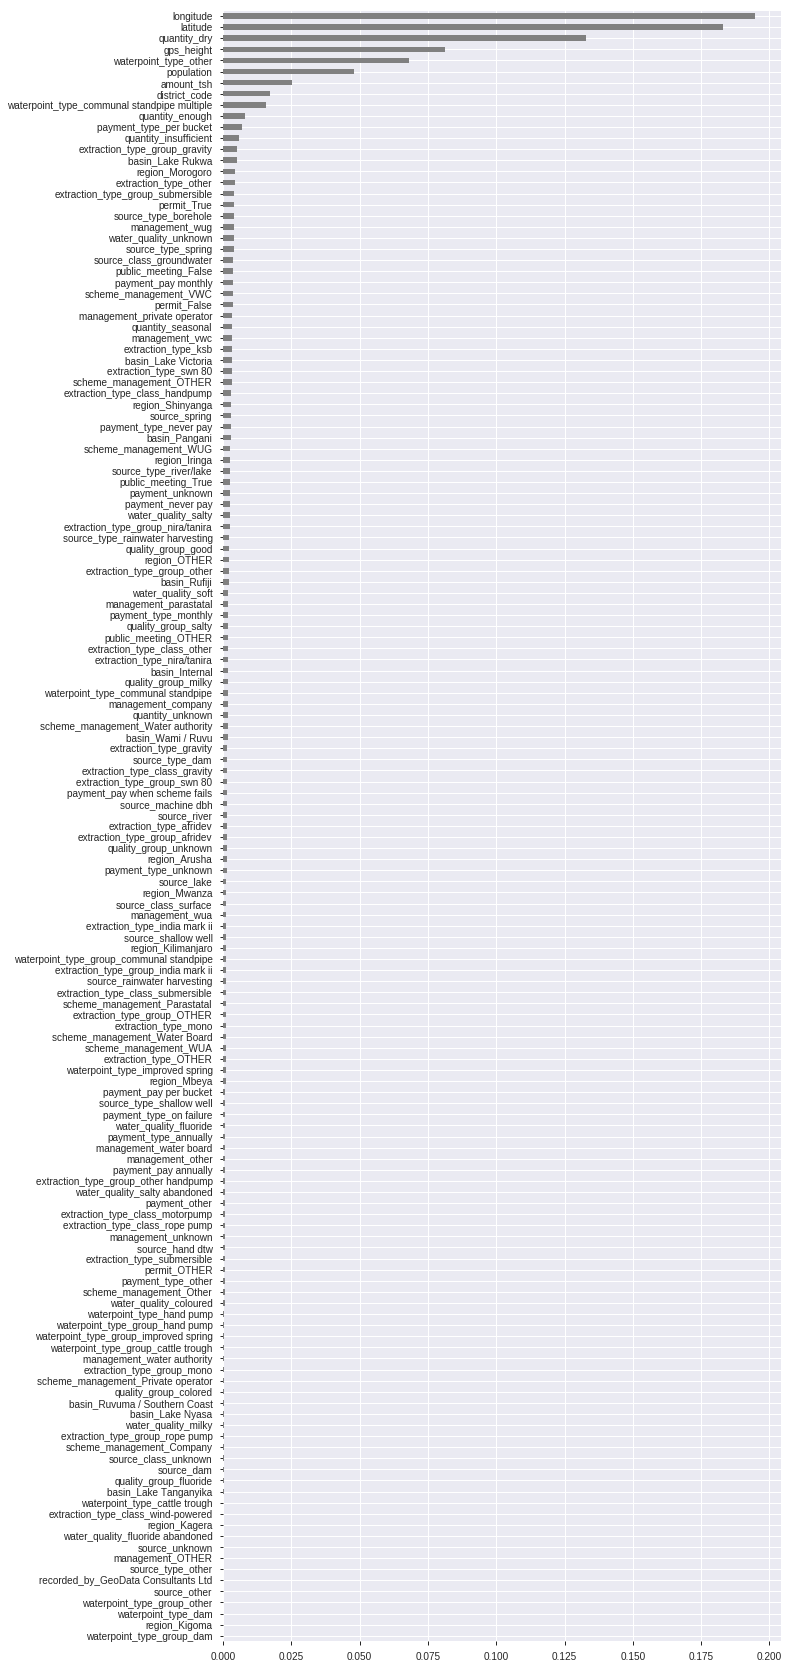

In [89]:
%matplotlib inline
import matplotlib.pyplot as plt

model = pipeline.named_steps['decisiontreeclassifier']
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns 
coefficients = pd.Series(model.feature_importances_, encoded_columns)
plt.figure(figsize=(10,30))
coefficients.sort_values().plot.barh(color='grey');